In [99]:
from src.clean_data import get_cleaned_data

df = get_cleaned_data()
df

cleaning data...


/Users/sueszli/dev/will-wohnen/src/clean_data.py:30: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lc = pd.to_datetime(lc)


,url,title,last_change,descriptions,price,broker,district,neubau,area,rooms,needs_fix
0,https://www.willhaben.at/iad/immobilien/d/eige...,kompakter 1-zimmer wohnhit in liesing,2024-03-26 20:35:00,zum verkauf steht eine kompakte wohnung mit ei...,129000.00,True,1230,False,31.01,1.0,False
1,https://www.willhaben.at/iad/immobilien/d/eige...,++++preissturz - gelegenheit mit wohnbauförder...,2024-03-26 20:35:00,erst vor wenigen tagen wurden die renovierungs...,145000.00,True,3465,True,81.40,3.0,None
2,https://www.willhaben.at/iad/immobilien/d/eige...,ruhig gelegene starter-/singlewohnung im 1. li...,2024-03-26 20:35:00,grundbuch statt sparbuch!die perfekte wohnlösu...,127000.00,True,1100,False,29.00,1.0,None
3,https://www.willhaben.at/iad/immobilien/d/eige...,#sq - unbefristet vermietet altbauwohnung in t...,2024-03-26 20:35:00,zum verkauf gelangt eine in toplage befindlich...,135000.00,True,1150,False,50.22,2.0,None
4,https://www.willhaben.at/iad/immobilien/d/eige...,"jetzt investieren und profitieren: 1,5-zimmer-...",2024-03-26 20:35:00,"tolle single-, studentenwohnung- wohnen im her...",119005.00,True,1100,False,31.57,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
435,https://www.willhaben.at/iad/immobilien/d/eige...,2 zimmer eigentumswohnung in top-lage 1220 wi...,2024-03-26 20:35:00,!!! anlegerhit !!!1220 wien - stadlauwohnfläch...,149000.00,True,1220,False,46.92,2.0,True
436,https://www.willhaben.at/iad/immobilien/d/eige...,wohnglück auf 30 m² | klein - fein - und alles...,2024-03-26 20:35:00,b>single-wohnung mit altbauflair sie suchen ei...,135000.00,True,1140,False,30.70,1.0,False
437,https://www.willhaben.at/iad/immobilien/d/eige...,klein aber fein - meine garçonnière in toplage,2024-03-26 20:35:00,wer eine kleine wohnung in heiß begehrter lage...,135000.00,True,1090,False,31.00,1.0,None
438,https://www.willhaben.at/iad/immobilien/d/eige...,top-preis,2024-03-26 20:35:00,top-preis die helle ca. 46 m² große altbauwoh...,136000.00,True,1100,None,46.50,NaN,True


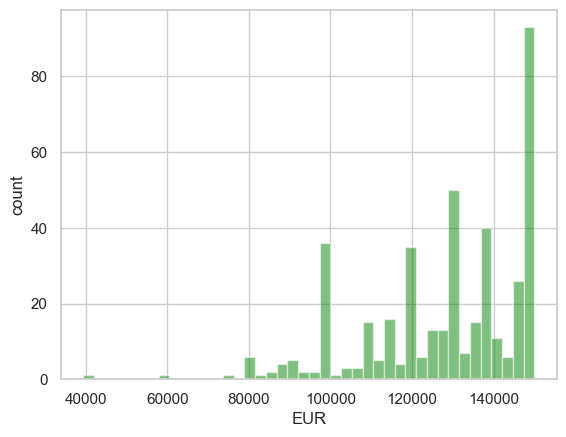

In [72]:
# price distribution

import matplotlib.pyplot as plt

num_bins = len(df) // 10
plt.hist(df["price"], bins=num_bins, color="green", alpha=0.5) 
plt.xlabel("EUR")
plt.ylabel("count")
plt.show()

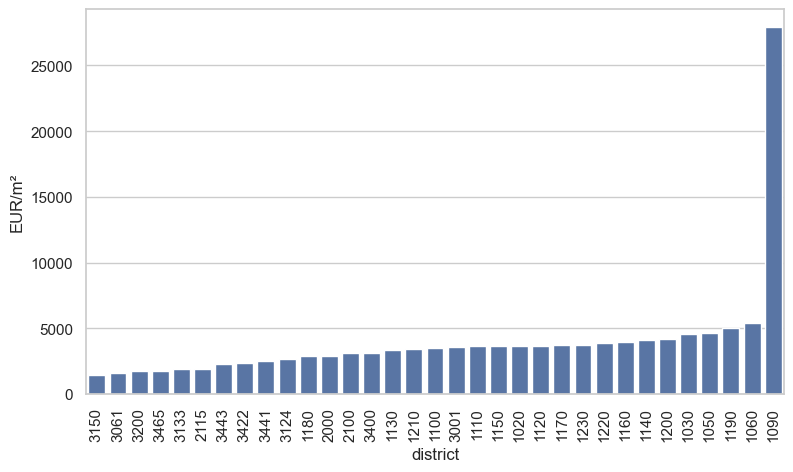

In [73]:
# get mean price per m² for each district

import seaborn as sns

districts = set(df["district"])

d_mean = {}
for d in districts:
    elems = df[df["district"] == d]
    prices = elems["price"]
    areas = elems["area"]
    ratio = prices / areas
    mean_ratio = ratio.mean()
    
    d_mean[d] = mean_ratio
d_mean = dict(sorted(d_mean.items(), key=lambda x: x[1]))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))
plt.xticks(rotation=90)
sns.barplot(x=list(d_mean.keys()), y=list(d_mean.values()))

plt.ylabel("EUR/m²")
plt.xlabel("district")

plt.show()